In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('credit_card_fraud.csv') 
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0


This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.

In [2]:
purchase = df[['category','amt','is_fraud']]
purchase

,category,amt,is_fraud
0,grocery_pos,107.23,0
1,entertainment,220.11,0
2,grocery_pos,96.29,0
3,shopping_pos,7.77,0
4,misc_pos,6.85,0
...,...,...,...
339602,home,12.68,0
339603,kids_pets,13.02,0
339604,health_fitness,43.77,0
339605,kids_pets,86.88,0


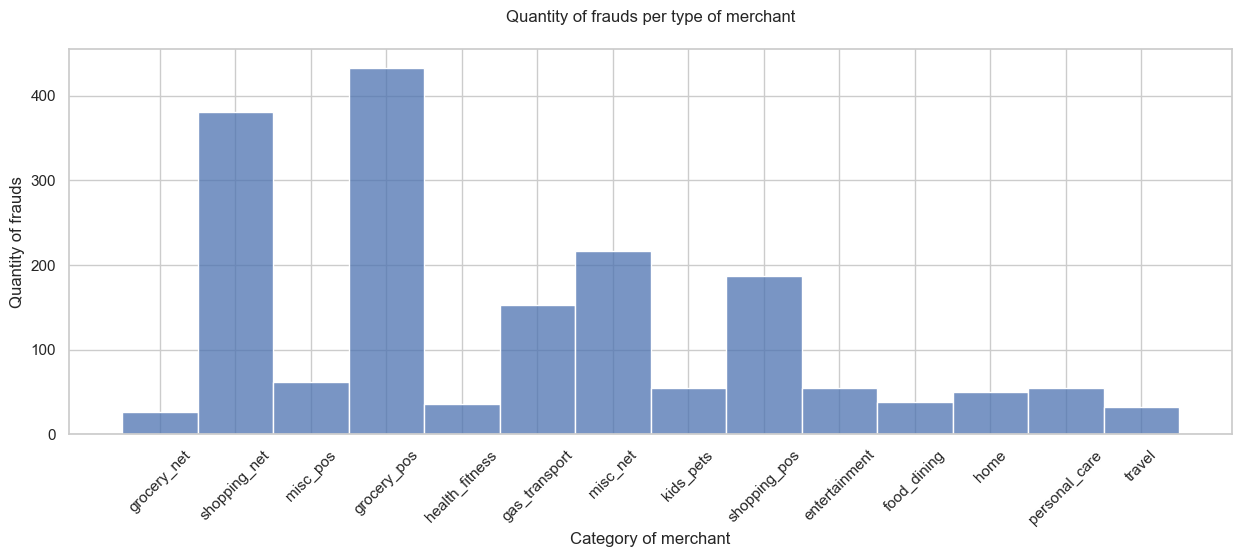

In [3]:
# Set the theme for the plot
sns.set_theme(style='whitegrid')

# Create a figure and axis for the histogram
fig, ax = plt.subplots(figsize=(15, 5))

sns.histplot(ax=ax, x='category', data=purchase[purchase['is_fraud'] == 1])

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', labelrotation=45)

# Set labels and title
ax.set_ylabel('Quantity of frauds')
ax.set_xlabel('Category of merchant')
ax.set_title('Quantity of frauds per type of merchant', y=1.05)
plt.show()

In [4]:
#set the dataframe to analyze the relation between older people and the quantity of frauds
old = df.copy()
old['dob'] = pd.to_datetime(old['dob']).dt.year
old['dob'] = 2023 - old['dob']
old.sort_values('dob')

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
186251,2020-02-22 19:15:55,Simonis-Prohask,misc_pos,2.14,Ballwin,MO,38.5770,-90.5255,92608,"Engineer, communications",22,26210e3e41fa68a219ac7b1afba22d71,38.986463,-90.536891,0
37187,2019-04-14 00:39:15,"Towne, Walker and Bore",grocery_net,75.03,Ballwin,MO,38.5770,-90.5255,92608,"Engineer, communications",22,b61d11a538a9ddecfcba37a22d2db9d8,37.653923,-90.772197,0
4230,2019-01-14 12:23:48,"Reichert, Rowe and Mraz",shopping_net,3.58,Ballwin,MO,38.5770,-90.5255,92608,"Engineer, communications",22,baab74b084eaa69c51c06688f85d0579,39.185678,-89.845902,0
312500,2020-11-29 14:30:02,Ankunding LLC,shopping_net,7.27,Ballwin,MO,38.5770,-90.5255,92608,"Engineer, communications",22,158f5484bc1e464b58c4a23cbcba4f07,37.806801,-89.871787,0
19418,2019-03-02 16:02:01,Kautzer and Sons,personal_care,2.53,Ballwin,MO,38.5770,-90.5255,92608,"Engineer, communications",22,7d841248a760034377be29524b1fec54,38.712864,-90.060583,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34056,2019-04-06 16:21:58,"Feil, Hilpert and Koss",food_dining,48.14,June Lake,CA,37.7773,-119.0825,633,Health service manager,96,617ba27b4f59c4a7b035ef12423bda74,38.439341,-118.650193,0
174970,2020-01-17 16:41:15,"Hettinger, McCullough and Fay",home,15.79,June Lake,CA,37.7773,-119.0825,633,Health service manager,96,529c556b6c1a79fb3945afba40fb12fd,38.628968,-118.748474,0
124955,2019-10-17 00:14:22,Gleason-Macejkovic,shopping_net,4.95,June Lake,CA,37.7773,-119.0825,633,Health service manager,96,d26701cdcf15fc3e8cfd1d1da07c9e54,37.433509,-118.618368,0
30276,2019-03-28 11:51:28,"Herman, Treutel and Dickens",misc_net,749.60,June Lake,CA,37.7773,-119.0825,633,Health service manager,96,81b93d8599fe574cb420313c5ceeb7f9,37.138420,-119.756403,0


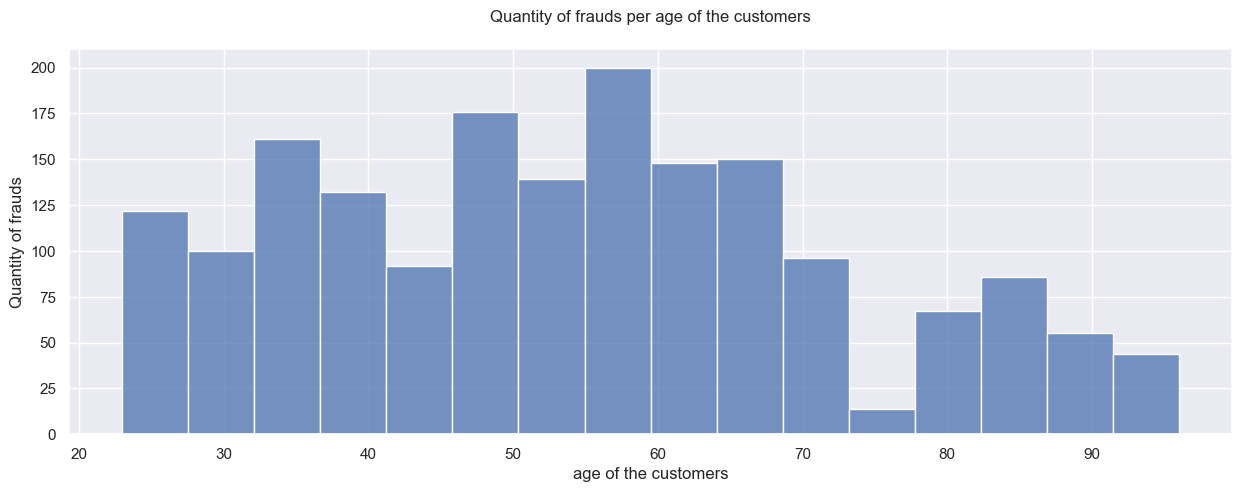

In [5]:
#plot the data.
sns.set()
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(ax = ax, x='dob', data = old[old['is_fraud'] == 1])
ax.set_title('Quantity of frauds per age of the customers', y = 1.05)
ax.set_xlabel('age of the customers')
ax.set_ylabel('Quantity of frauds')
plt.show()